# Classify the Galaxies

## Set Up

In [2]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano

import sys

from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

#image dimensions
img_rows, img_cols = 300, 300

# number of channels
img_channels = 1


## Create DataFrame of Images

### Verify Can Load Images

In [3]:
train_dir = 'data/LWdata/train'    #path of folder of images    
save_dir = 'data/LWdata/galaxyprocess2'  #path of folder to save images   

In [4]:
samples = os.listdir(train_dir) 
num_samples=size(samples)
print(num_samples)

160


### Create Image DataFrames

In [5]:
#loop through all images and convert to grayscale
for file in samples:
    im = Image.open(train_dir + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here           
    gray.save(save_dir +'/' +  file, "JPEG")

In [6]:
imlist = os.listdir(save_dir)

In [8]:
im1 = array(Image.open('data/LWdata/galaxyprocess2' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

In [9]:
m

300

In [10]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(save_dir + '/' + im2)).flatten()
              for im2 in imlist],'f')

In [11]:
label=np.ones((num_samples,),dtype = int)
label[0:101]=0
label[101:201]=1
label[201:301]=2
label[301:]=3

In [12]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

(160, 90000)
(160,)


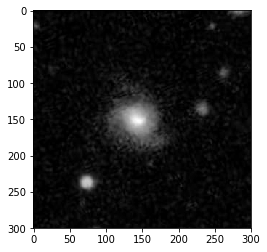

In [15]:
img=immatrix[10].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

## Train the Model

In [16]:
#batch_size to train
batch_size = 20 #WAS 32
# number of output classes
nb_classes = 4
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [17]:
(X, y) = (train_data[0],train_data[1])

In [18]:
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [19]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
X_train /= 400
X_test /= 400

In [22]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (128, 1, 300, 300)
128 train samples
32 test samples


In [23]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

label :  [0. 1. 0. 0.]


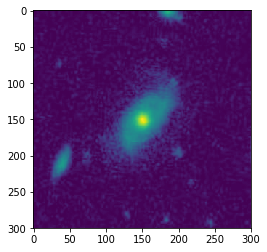

In [24]:
i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [25]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,img_rows,img_cols), data_format='channels_first'))
                
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, (nb_conv, nb_conv)))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
               verbose=1, validation_split=0.2)

/opt/conda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 102 samples, validate on 26 samples
Epoch 1/20
102/102 [==============================] - 76s 741ms/step - loss: 1.3677 - acc: 0.5098 - val_loss: 0.9704 - val_acc: 0.5769
Epoch 2/20
102/102 [==============================] - 75s 733ms/step - loss: 0.8543 - acc: 0.5588 - val_loss: 0.7606 - val_acc: 0.5769
Epoch 3/20
102/102 [==============================] - 77s 757ms/step - loss: 0.7540 - acc: 0.5784 - val_loss: 0.8225 - val_acc: 0.5769
Epoch 4/20
102/102 [==============================] - 75s 739ms/step - loss: 0.7101 - acc: 0.6078 - val_loss: 0.8025 - val_acc: 0.5769
Epoch 5/20
102/102 [==============================] - 75s 735ms/step - loss: 0.7398 - acc: 0.6275 - val_loss: 0.8761 - val_acc: 0.5769
Epoch 6/20
102/102 [==============================] - 75s 739ms/step - loss: 0.6803 - acc: 0.5784 - val_loss: 0.8091 - val_acc: 0.5769
Epoch 7/20
102/102 [==============================] - 72s 709ms/step - loss: 0.7009 - acc: 0.6275 - val_loss: 0.7128 - val_acc: 0.5769
Epoch 8/20

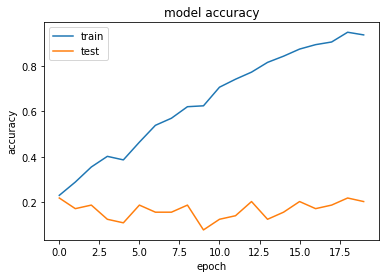

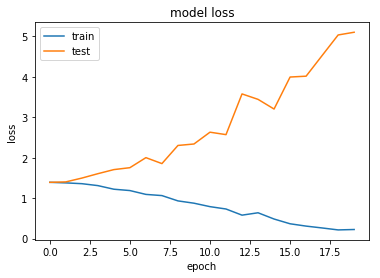

In [43]:
#Show model metrics over the epochs
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize model epoch history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)

In [90]:
target_names = ['class 0 (Spiral)', 'class 1 (Smooth)', 'class 2   (EDGE)', 'class 3  (OTHER)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

                  precision    recall  f1-score   support

class 0 (Spiral)       0.16      0.22      0.19        18
class 1 (Smooth)       0.13      0.11      0.12        19
class 2   (EDGE)       0.20      0.11      0.14        19
class 3  (OTHER)       0.33      0.42      0.37        24

       micro avg       0.23      0.23      0.23        80
       macro avg       0.21      0.21      0.20        80
    weighted avg       0.22      0.23      0.21        80



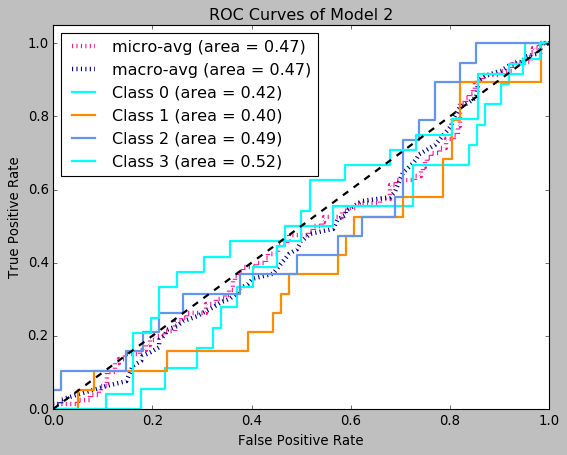

In [108]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nb_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nb_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-avg (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-avg (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nb_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Model 2')
plt.legend(loc="upper left")
plt.show()